In [6]:
import pandas as pd
import seaborn as sns
import koreanize_matplotlib
import pyarrow.parquet as pq
import fastparquet
import pandas as pd
import glob

# 그래프에 retina display 적용
%config InlineBackend.figure_format = 'retina'

In [33]:
song_list = glob.glob("*.csv")
song_list

['etc_data.csv',
 'melon_ballad_최신_가사.csv',
 'melon_dance_total.csv',
 'melon_folkblues_인기_가사__12124.csv',
 'melon_hiphop_인기_스테디_가사.csv',
 'melon_록메탈_최신_가사_인기순.csv']

In [34]:
songs = []
for file_name in song_list:
    df = pd.read_csv(file_name)
    print(file_name, " shape : ", df.shape)
    songs.append(df)

etc_data.csv  shape :  (564, 3)
melon_ballad_최신_가사.csv  shape :  (16494, 3)
melon_dance_total.csv  shape :  (11069, 3)
melon_folkblues_인기_가사__12124.csv  shape :  (12124, 4)
melon_hiphop_인기_스테디_가사.csv  shape :  (10390, 3)
melon_록메탈_최신_가사_인기순.csv  shape :  (8412, 4)


In [48]:
# 컬럼 4개인애들 정리
songs[3] = songs[3].drop(columns="Unnamed: 0")
songs[3].shape

(12124, 3)

In [38]:
# 의준님이 록메탈은 지워달라고 하심
songs = songs[:-1]

In [49]:
# 합치기
all = pd.concat(songs)
print(all.shape)
all.tail()

(50641, 3)


,제목,가사,장르
10385,하루살이,저 멀리 희미하게\r\n반짝이는 빛이 보이네\r\n난 어둠을 피하려는 하루살이\r\...,힙합
10386,Sniper Sound,Double S Oh\r\nDouble S Oh\r\nDouble S Oh\r\ny...,힙합
10387,내 곁에 살게 하고 싶어서 (Feat. 서령),아직도 내겐 눈물이 많아서\r\n니 사진 다시\r\n꺼내지도 못해 난\r\n세상엔 ...,힙합
10388,It's True (Feat. 백지영),꿈이 아니길 바랬어 Oh\r\n그녀가 내게 말했어\r\n꿈이 아니길 바랬어\r\n어...,힙합
10389,그대만이 그대니라,그대만이 그대니라\r\n\r\nUh Yeah 그대는 어디 Uh Yeah 난 지금 여...,힙합


In [50]:
# 중복데이터 확인
all[all.duplicated(subset=["제목", "가사"])]

,제목,가사,장르
633,Buttercup,언제부턴가 사랑으로 녹아\n스며들어오는 너야\n마음 너를 향한 마음 가득히\n넘쳐흘...,댄스
2531,Here Now (Feat. 김진성),지금까지 잘해왔잖아\n모든 것이 눈앞에 있어\n마법처럼 바래왔던 꿈\n혼자라고 생각...,댄스
2751,어지러워요,참 오랜만이야 그동안 잘 지냈니\n난 너 없이도 하루 하루 살아가\n친구에게 네 소...,댄스
45,Shall We Dance,한층 더 높이 올라 있는 듯한\r\n무서울 만큼 완벽한 이 시간\r\n평화롭게 흘러...,포크블루스
46,좋아요 (Feat.그_냥),만나요 우리\r\n언제가 좋아요\r\n오늘은 어때요\r\n너무 이른가요\r\n보고 ...,포크블루스
...,...,...,...
7038,Ma Boy 2 (Remix),Can't stop lovin' you ma\r\n마주보고 앉아서 서로 웃고\r\n...,힙합
7483,그냥 가요 (Feat. 조현아 Of 어반자카파),그냥 가요 할 말 더 없으면\r\n나 원래 술이 세서 마셔도\r\n취하지도 않아요\...,힙합
7758,봄 여름 가을... 겨울 (Feat. 김태우 God),내 맘속에 있는 말\r\n지금부터 고백할게\r\n사랑을(사랑해)\r\n하루도 너 없...,힙합
8253,LoveSick,uhh doctor\r\n지금부터 제가 할 이야기는요\r\n혼자만 아셔야 해요\r\...,힙합


In [51]:
all = all.drop_duplicates(subset=["제목", "가사"])
all.shape

(46707, 3)

In [52]:
all = all.reset_index(drop=True)
all.tail()

,제목,가사,장르
46702,하루살이,저 멀리 희미하게\r\n반짝이는 빛이 보이네\r\n난 어둠을 피하려는 하루살이\r\...,힙합
46703,Sniper Sound,Double S Oh\r\nDouble S Oh\r\nDouble S Oh\r\ny...,힙합
46704,내 곁에 살게 하고 싶어서 (Feat. 서령),아직도 내겐 눈물이 많아서\r\n니 사진 다시\r\n꺼내지도 못해 난\r\n세상엔 ...,힙합
46705,It's True (Feat. 백지영),꿈이 아니길 바랬어 Oh\r\n그녀가 내게 말했어\r\n꿈이 아니길 바랬어\r\n어...,힙합
46706,그대만이 그대니라,그대만이 그대니라\r\n\r\nUh Yeah 그대는 어디 Uh Yeah 난 지금 여...,힙합


In [53]:
all["장르"].value_counts()

발라드      16494
댄스       11066
힙합       10003
포크블루스     8580
뮤지컬        405
동요         159
Name: 장르, dtype: int64

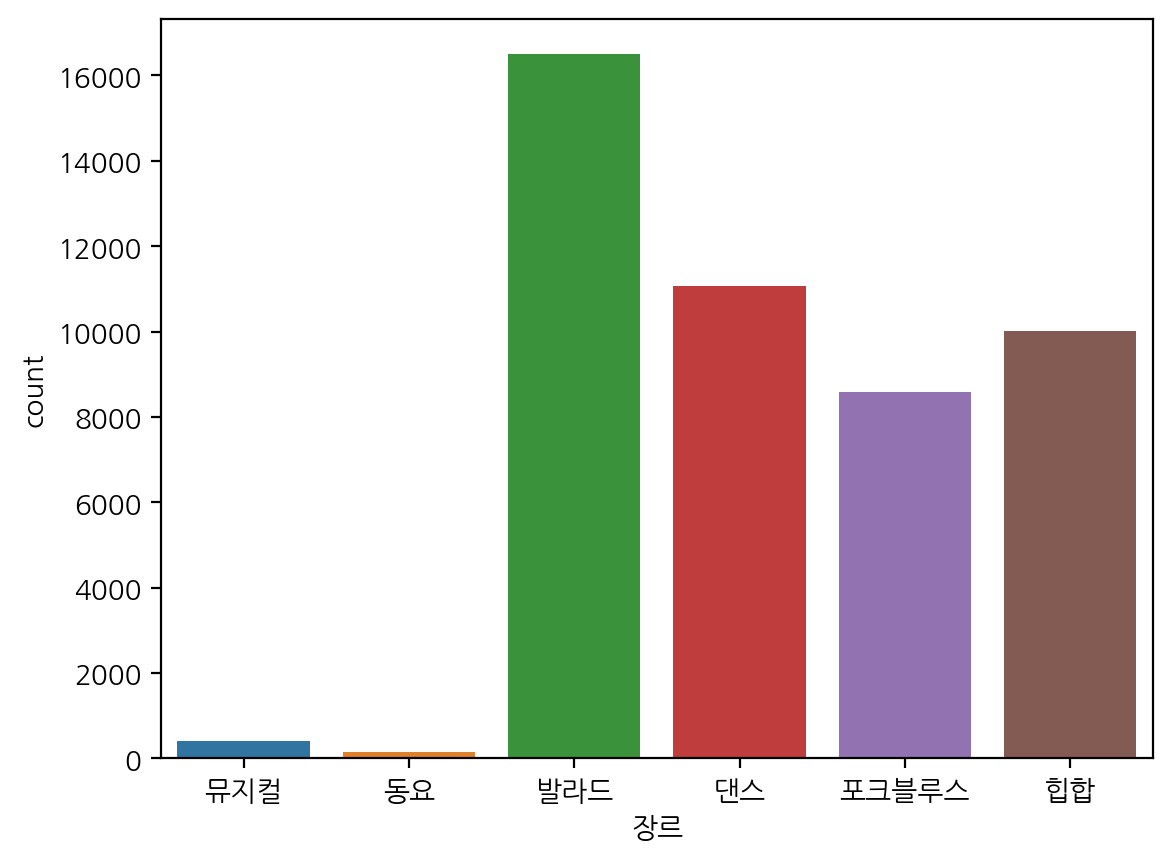

In [54]:
# 데이터 확인
_ = sns.countplot(data=all, x="장르")

In [55]:
# 다운캐스트 하기
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46707 entries, 0 to 46706
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   제목      46707 non-null  object
 1   가사      46707 non-null  object
 2   장르      46707 non-null  object
dtypes: object(3)
memory usage: 1.1+ MB


In [56]:
all["장르"] = all["장르"].astype("category")

In [57]:
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46707 entries, 0 to 46706
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype   
---  ------  --------------  -----   
 0   제목      46707 non-null  object  
 1   가사      46707 non-null  object  
 2   장르      46707 non-null  category
dtypes: category(1), object(2)
memory usage: 775.7+ KB


In [58]:
# parquet 로 저장하기
all.to_parquet("all_append_csv.gzip", compression="gzip")

In [59]:
pd.read_parquet("all_append_csv.gzip")

,제목,가사,장르
0,무지개 (Rainbow) (Feat. 조용휘),동그랗고 하얀 이마\n오똑한 반짝이는 코\n다갈색 눈동자 옆 살짝 보이는 점까지\n...,뮤지컬
1,나 주는 줄 알고 손 내밀었잖아,넌 밉고 난 쪽팔린다\n뭘 이런 걸 다 사 왔어 할지\n헉 뭐야 고마워 할지\n아이...,뮤지컬
2,너와나,이 땅위에 태어나 비로소 여기 있네\n우리 모두가 그리던 그 날\n바라고 바라던 꿈...,뮤지컬
3,나만의 언어 rep.,"(좋아)\n나는 널 이렇게 부를게\n(자유, 그래 자유)\n난 너를 이렇게 부를래\...",뮤지컬
4,여기는 엄마 컴퍼니,어떤 엄마를 원하십니까\n원하는 엄마를 고를 수 있는\n여기는 바로 바로 엄마컴퍼니...,뮤지컬
...,...,...,...
46702,하루살이,저 멀리 희미하게\r\n반짝이는 빛이 보이네\r\n난 어둠을 피하려는 하루살이\r\...,힙합
46703,Sniper Sound,Double S Oh\r\nDouble S Oh\r\nDouble S Oh\r\ny...,힙합
46704,내 곁에 살게 하고 싶어서 (Feat. 서령),아직도 내겐 눈물이 많아서\r\n니 사진 다시\r\n꺼내지도 못해 난\r\n세상엔 ...,힙합
46705,It's True (Feat. 백지영),꿈이 아니길 바랬어 Oh\r\n그녀가 내게 말했어\r\n꿈이 아니길 바랬어\r\n어...,힙합
